<a href="https://colab.research.google.com/github/MadhulikaPutrevu2/Pathlossinception/blob/main/PATHLOSSINCEPTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install q keras==2.3.1

In [ ]:
!pip uninstall tensorflow -y
!pip install tensorflow==2.2.0

Uninstalling tensorflow-2.2.0:
  Successfully uninstalled tensorflow-2.2.0
  Using cached https://files.pythonhosted.org/packages/3d/be/679ce5254a8c8d07470efb4a4c00345fae91f766e64f1c2aece8796d7218/tensorflow-2.2.0-cp36-cp36m-manylinux2010_x86_64.whl


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras
import keras_applications
from tensorflow.keras import layers 
from tensorflow.keras import Model 
from tensorflow.keras.applications.inception_v3 import InceptionV3 
from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import os
import keras

Using TensorFlow backend.


In [ ]:
import plotly.io as pio
pio.templates.default = 'plotly_dark'

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fid = drive.ListFile({'q':"title='mapbox.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('mapbox.zip')

In [ ]:
f.keys()

dict_keys(['id', 'kind', 'etag', 'selfLink', 'webContentLink', 'alternateLink', 'embedLink', 'iconLink', 'title', 'mimeType', 'labels', 'copyRequiresWriterPermission', 'createdDate', 'modifiedDate', 'modifiedByMeDate', 'lastViewedByMeDate', 'markedViewedByMeDate', 'version', 'parents', 'downloadUrl', 'userPermission', 'originalFilename', 'fileExtension', 'md5Checksum', 'fileSize', 'quotaBytesUsed', 'ownerNames', 'owners', 'lastModifyingUserName', 'lastModifyingUser', 'capabilities', 'editable', 'copyable', 'writersCanShare', 'shared', 'explicitlyTrashed', 'appDataContents', 'headRevisionId', 'spaces'])

In [ ]:
!unzip mapbox.zip

Streaming output truncated to the last 5000 lines.
  inflating: mapbox/train/LOCATION_LTEA2/35311.png  
  inflating: mapbox/train/LOCATION_LTEA2/35312.png  
  inflating: mapbox/train/LOCATION_LTEA2/35313.png  
  inflating: mapbox/train/LOCATION_LTEA2/35314.png  
  inflating: mapbox/train/LOCATION_LTEA2/35315.png  
  inflating: mapbox/train/LOCATION_LTEA2/35316.png  
  inflating: mapbox/train/LOCATION_LTEA2/35317.png  
  inflating: mapbox/train/LOCATION_LTEA2/35318.png  
  inflating: mapbox/train/LOCATION_LTEA2/35319.png  
  inflating: mapbox/train/LOCATION_LTEA2/35320.png  
  inflating: mapbox/train/LOCATION_LTEA2/35321.png  
  inflating: mapbox/train/LOCATION_LTEA2/35322.png  
  inflating: mapbox/train/LOCATION_LTEA2/35323.png  
  inflating: mapbox/train/LOCATION_LTEA2/35324.png  
  inflating: mapbox/train/LOCATION_LTEA2/35325.png  
  inflating: mapbox/train/LOCATION_LTEA2/35326.png  
  inflating: mapbox/train/LOCATION_LTEA2/35327.png  
  inflating: mapbox/train/LOCATION_LTEA2/35328.p

In [ ]:
PATH = '/content/mapbox'

In [ ]:
os.listdir(PATH)

['train', 'test']

In [ ]:
train_dir = os.path.join(PATH,
                         'train')
test_dir = os.path.join(PATH,
                        'test')

In [ ]:
train_ltea1_dir = os.path.join(train_dir,
                                'LOCATION_LTEA1')
train_ltea2_dir = os.path.join(train_dir,
                                   'LOCATION_LTEA2')

test_ltea1_dir = os.path.join(test_dir,
                               'LOCATION-LTEA1')
test_ltea2_dir = os.path.join(test_dir,
                                  'LOCATION-LTEA2')

In [ ]:
len(os.listdir(train_dir))

2

In [ ]:
len(os.listdir(test_dir))

2

In [ ]:
len(os.listdir(train_ltea1_dir))

20156

In [ ]:
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [ ]:
image_gen = ImageDataGenerator(
    rescale=1./255
    )

In [ ]:
train_data_gen = image_gen.flow_from_directory(
    #batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 40311 images belonging to 2 classes.


In [ ]:
test_data_gen = image_gen.flow_from_directory(
    #batch_size=batch_size,
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 17275 images belonging to 2 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(3, 4, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

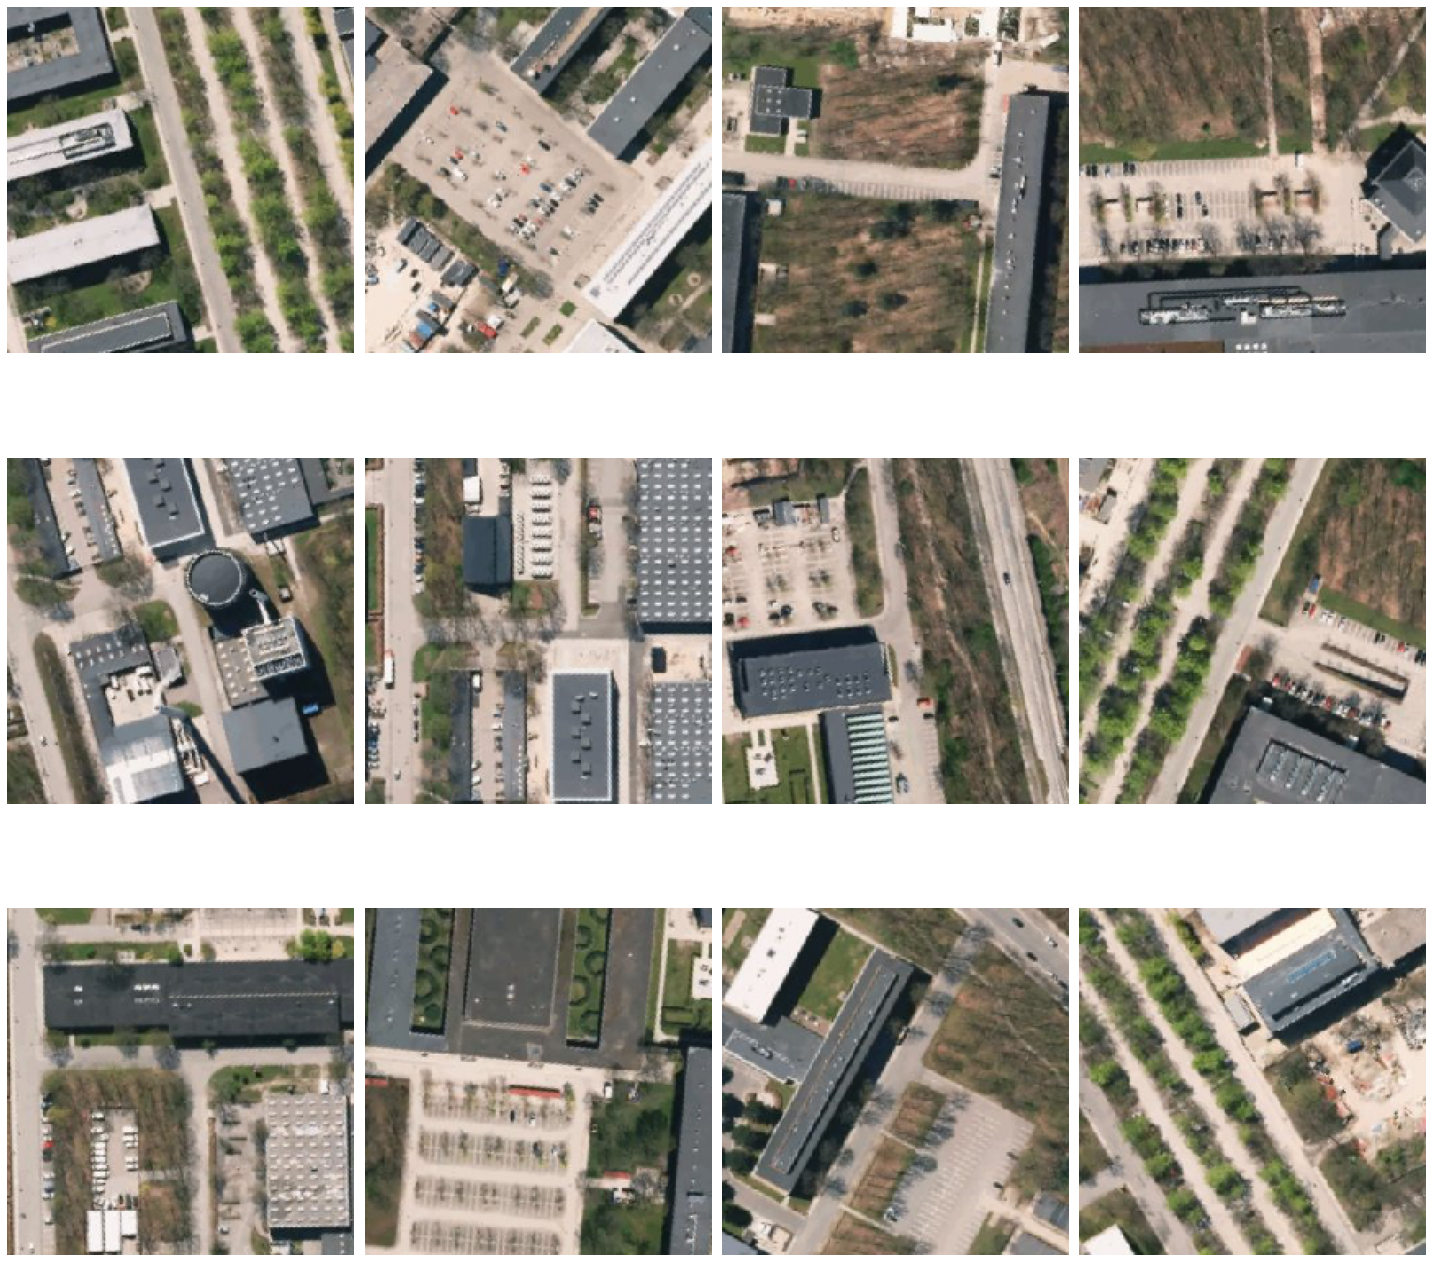

In [ ]:
plotImages(sample_training_images[:12])

In [ ]:
base_model = InceptionV3(input_shape = (212, 212, 3),  
                                include_top = False,  
                                weights = 'imagenet') 
for layer in base_model.layers: 
  layer.trainable = False
  

In [ ]:
x = layers.Flatten()(base_model.output) 

x = layers.Dense(1024, activation='relu')(x) 
#x = layers.Dropout(0.4)(x)                  
x = layers.Dense  (2, activation='sigmoid')(x)            
  
model = Model( base_model.input, x) 

In [ ]:
model.compile(optimizer = 'sgd',loss = 'binary_crossentropy',metrics = ['acc']) 


In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 212, 212, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 105, 105, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 105, 105, 32) 96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 105, 105, 32) 0           batch_normalization_282[0][0]    
____________________________________________________________________________________________

In [ ]:
num_ltea1_train = len(os.listdir(train_ltea1_dir))
num_ltea2_train = len(os.listdir(train_ltea2_dir))


num_ltea1_test = len(os.listdir(test_ltea1_dir))
num_ltea2_test = len(os.listdir(test_ltea2_dir))


total_train = num_ltea1_train + num_ltea2_train 
total_test = num_ltea1_test + num_ltea2_test 

In [ ]:
batch_size = 120
epochs = 2

In [ ]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=total_test // batch_size,
    callbacks = [tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.0001
       
        )])

Epoch 1/2
335/335 [==============================] - 1482s 4s/step - loss: 0.5943 - acc: 0.6904 - val_loss: 0.9204 - val_acc: 0.6215
Epoch 2/2
335/335 [==============================] - 1480s 4s/step - loss: 0.4630 - acc: 0.7280 - val_loss: 0.9505 - val_acc: 0.6259


In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['acc'],
                         mode='lines+markers',
                         name='Training accuracy'))
fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['val_acc'],
                         mode='lines+markers',
                         name='Validation accuracy'))
fig.update_layout(title='Accuracy',
                  xaxis=dict(title='Epoch'),
                  yaxis=dict(title='Percentage'))
fig.show()

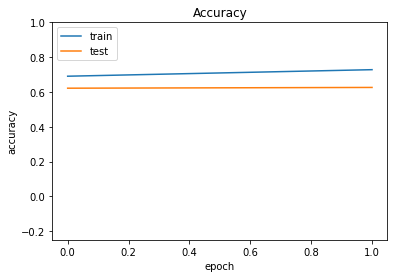

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.ylim(-0.25,1.00)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

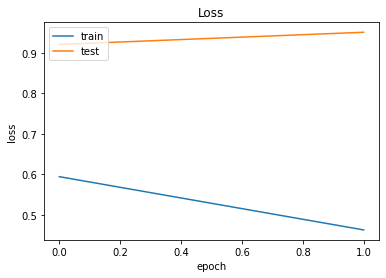

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(test_data_gen, steps=50)

print ('Validation Score: ', score[0])
print ('Validation Accuracy: ',score[1])

50/50 [==============================] - 148s 3s/step - loss: 0.9406 - acc: 0.6194
Validation Score:  0.9405848979949951
Validation Accuracy:  0.6193749904632568
